In [33]:
import torch
import math
# this ensures that the current MacOS version is at least 12.3+
print(torch.backends.mps.is_available())
# this ensures that the current current PyTorch installation was built with MPS activated.
print(torch.backends.mps.is_built())

True
True


In [34]:
dtype = torch.float
device = torch.device("mps")

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

# Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

99 325.6036682128906
199 226.90138244628906
299 159.12091064453125
399 112.51918029785156
499 80.44256591796875
599 58.339576721191406
699 43.09250259399414
799 32.563453674316406
899 25.284839630126953
999 20.248104095458984
1099 16.759193420410156
1199 14.340093612670898
1299 12.661170959472656
1399 11.494848251342773
1499 10.683914184570312
1599 10.119572639465332
1699 9.7265043258667
1799 9.452529907226562
1899 9.261407852172852
1999 9.127981185913086


In [31]:
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [28]:
!pip install -Uqq fastai
!pip install duckduckgo_search

In [35]:
from fastai.vision.all import *
from fastai.data.all import *
from fastcore.all import *
from fastdownload import download_url
from duckduckgo_search import ddg_images
from matplotlib import pyplot as plt
from time import sleep

In [20]:
def search_images(term, max_images=50):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results = max_images)).itemgot('image')

In [21]:
cityList = ['Tokyo', 'Seoul', 'London', 'Cairo', 'Beijing', 'New York']

In [18]:
photos = 'photos'
jpgFormat = '.jpg'
satPh = 'satellite photos'


#for cL in cityList:
# download_url(search_images(f'{cL} {satPh}', max_images=1)[0], f'{cL} {jpgFormat}', show_progress=False)

In [19]:
path = Path('citySatSearch')


In [36]:
for cL in cityList:
    dest = (path/cL)
    dest.mkdir(exist_ok=True, parents = True)
    download_images(dest, urls=search_images(f'{cL} {satPh}'))
    #sleep(10)
    resize_images(path/cL, max_size=400, dst=path/cL)

Searching for 'Tokyo satellite photos'
Searching for 'Seoul satellite photos'
Searching for 'London satellite photos'
Searching for 'Cairo satellite photos'
Searching for 'Beijing satellite photos'
Searching for 'New York satellite photos'


In [37]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

4

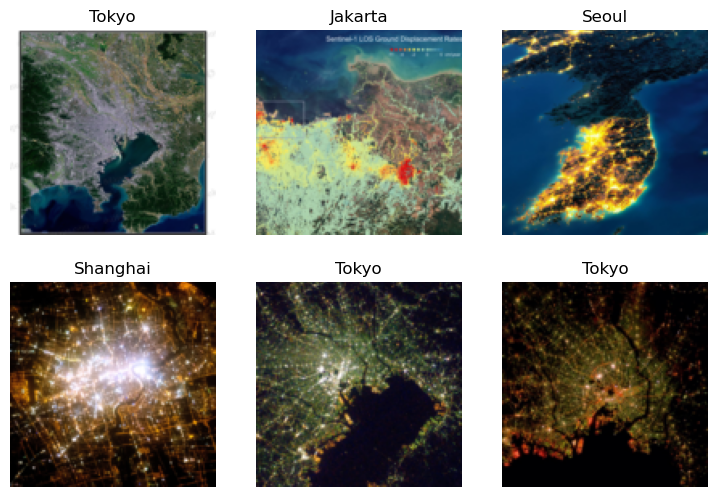

In [38]:
dls = DataBlock(
      blocks=(ImageBlock, CategoryBlock),
      get_items=get_image_files,
      splitter=RandomSplitter(valid_pct=0.2, seed=42),
      get_y=parent_label,
      item_tfms=[Resize(128)]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [39]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.572551,2.034941,0.618056,00:34


epoch,train_loss,valid_loss,error_rate,time
0,1.967517,1.384671,0.388889,00:43
1,1.510968,0.979296,0.291667,00:43
2,1.101322,0.817491,0.208333,00:43
3,0.845219,0.788706,0.208333,00:42


In [54]:
citySatPicTest = 'CapeTownTest002 Medium.jpeg'

this_city_is,_,probs = learn.predict(PILImage.create(citySatPicTest))
#img_color = cv2.imread(citySatPicTest,1)
#plt.axis("off")
#plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
#plt.show()
print(f"There is a {100*probs[0]:.2f}% chance this is {this_city_is}.")

There is a 9.45% chance this is Jakarta.


In [56]:
learn.export()

In [57]:

path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [58]:
learn_inf = load_learner(path/'export.pkl')

In [69]:
learn_inf.predict(path/'SeoulTest002 Medium.jpeg')

('Seoul',
 TensorBase(8),
 TensorBase([3.1512e-02, 6.8550e-03, 3.0382e-02, 2.6617e-03, 2.8247e-02,
             4.3017e-04, 1.0125e-02, 1.8021e-03, 8.2935e-01, 1.8629e-02,
             3.6512e-02, 3.4913e-03]))

In [70]:
learn_inf.dls.vocab
     

['Beijing', 'Cairo', 'Delhi', 'Jakarta', 'London', 'Manila', 'Mumbai', 'New York', 'Seoul', 'Shanghai', 'São Paulo', 'Tokyo']

In [72]:
from fastai.vision.widgets import *
#hide_output
btn_upload = widgets.FileUpload()
btn_upload
     

FileUpload(value={}, description='Upload')

In [73]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = [path/'SeoulTest002 Medium.jpeg'])

In [74]:
img = PILImage.create(btn_upload.data[-1])

In [75]:

#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [76]:
pred,pred_idx,probs = learn_inf.predict(img)

In [77]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Seoul; Probability: 0.8294')

In [78]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [79]:

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [80]:

#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [82]:
#hide_output
VBox([widgets.Label('Select your satellite image!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [84]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 4.3 MB/s eta 0:00:00
  Using cached nbconvert-7.2.9-py3-none-any.whl (274 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached tinycss2-1.2.1-py3-none-any.whl (21 kB)
  Attempting uninstall: mistune
    Found existing installation: mistune 0.8.4
    Uninstalling mistune-0.8.4:
      Successfully uninstalled mistune-0.8.4
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 6.4.4
    Uninstalling nbconvert-6.4.4:
      Successfully uninstalled nbconvert-6.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.3.3 req